Importing Libraries

In [1]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
import pprint
# Math
from scipy.stats import loguniform
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report, matthews_corrcoef
# Scaling
from sklearn.preprocessing import StandardScaler
# Processing Data
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV, PredefinedSplit
from sklearn.model_selection import PredefinedSplit
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier


# Loading & Explorating Dataset

In [2]:
#import data set
Credit = pd.read_csv("Creditcard.csv")

In [3]:
Credit.shape
Credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
Credit.head(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# check for null values  - no null values to clean

Credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Statistical summary
Credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Check duplicates
Credit.duplicated().sum()

1081

In [9]:
# check for the balance of data

print(f' Fraud vs. Non Fraud: \n {np.round(Credit["Class"].value_counts().sort_values() / len(Credit) * 100, 2)}')

 Fraud vs. Non Fraud: 
 1     0.17
0    99.83
Name: Class, dtype: float64


# Data Preprocessing

In [10]:
# check if duplicated values relation with our target
ddf=Credit[Credit.duplicated()]
ddf.shape

(1081, 31)

In [11]:
# display original and duplicated rows
Credit[Credit.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [12]:
# Total number of duplicated values for our Fraud transaction in Target 'Class'
ddfsum = ddf[ddf["Class"]==1]['Class'].sum()
# 10% of total size of Fraud pool
totten= len(Credit[Credit['Class']==1])
DupToTot= round((ddfsum/totten)*100,2)
print ("Duplicated values in Fraud {} is about {} % of {} total values.".format(ddfsum,DupToTot,totten))
print ("Removel of duplication is accepted.")

Duplicated values in Fraud 19 is about 3.86 % of 492 total values.
Removel of duplication is accepted.


In [13]:
# drop duplicated values and reset index
Credit.drop_duplicates(inplace=True, ignore_index=True)

In [14]:
# Check duplicated rows
Credit.loc[Credit.duplicated(),:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


drop un necessary column

# Data Visualization

Univariate Analysis

In [15]:
# Ratio of fraud '1' and non fraud '0' cases compare to the whole dataset
Credit['Class'].value_counts()/len(Credit.index)

0    0.998333
1    0.001667
Name: Class, dtype: float64

Text(0.5, 1.0, 'Class Distributions (0: Not Fraud || 1: Fraud)')

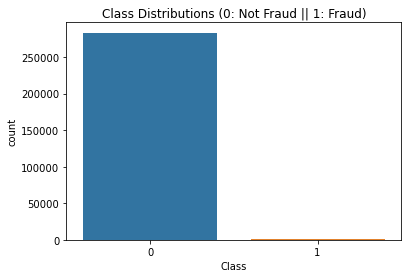

In [16]:
# Plot target distribution
sns.countplot('Class', data=Credit)
plt.title('Class Distributions (0: Not Fraud || 1: Fraud)', fontsize=12)

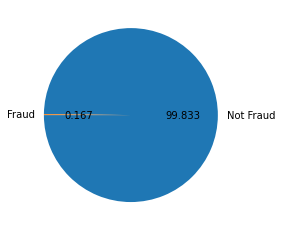

In [17]:
plt.pie(Credit.Class.value_counts(),labels=['Not Fraud','Fraud'],startangle=180,autopct='%.3f');


Bivariante Analysis
Between Target variable and Features.


In [18]:
# Time statistical summary across fraud and not fraud transactions.
print ("Fraud")
print (Credit.Time[Credit.Class == 1].describe())
print ()
print ("Not Fraud")
print (Credit.Time[Credit.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Not Fraud
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


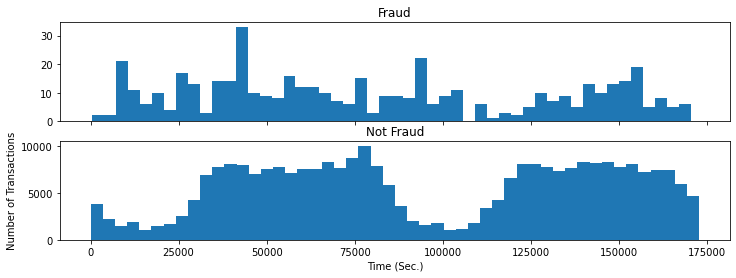

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(Credit.Time[Credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(Credit.Time[Credit.Class == 0], bins = bins)
ax2.set_title('Not Fraud')

plt.xlabel('Time (Sec.)')
plt.ylabel('Number of Transactions')
plt.show()


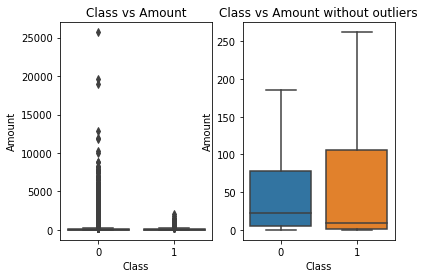

In [20]:
f, axes = plt.subplots(ncols=2)

sns.boxplot(x="Class", y="Amount", data=Credit, ax=axes[0],showfliers=True)
axes[0].set_title('Class vs Amount')

sns.boxplot(x="Class", y="Amount", data=Credit, ax=axes[1],showfliers=False)
axes[1].set_title('Class vs Amount without outliers')

plt.show()

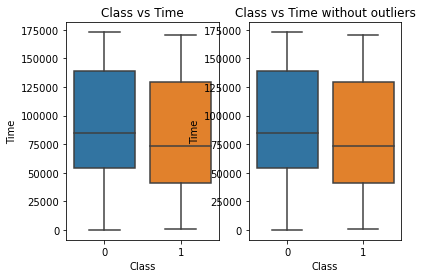

In [21]:
f, axes = plt.subplots(ncols=2)

sns.boxplot(x="Class", y="Time", data=Credit, ax=axes[0],showfliers=True)
axes[0].set_title('Class vs Time')

sns.boxplot(x="Class", y="Time", data=Credit, ax=axes[1],showfliers=False)
axes[1].set_title('Class vs Time without outliers')

plt.show()


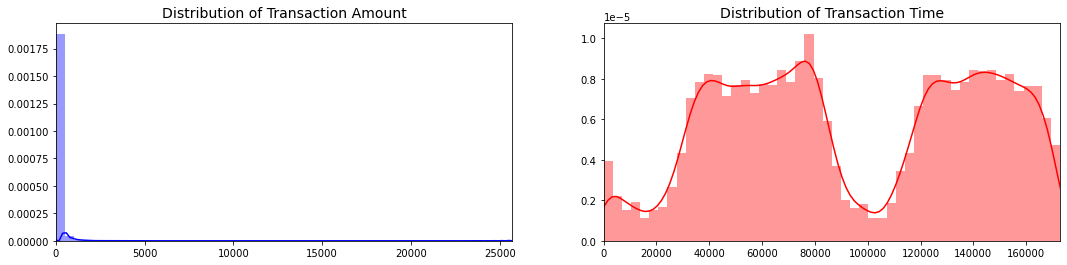

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = Credit['Amount'].values
time_val = Credit['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


Multivariante Analysis

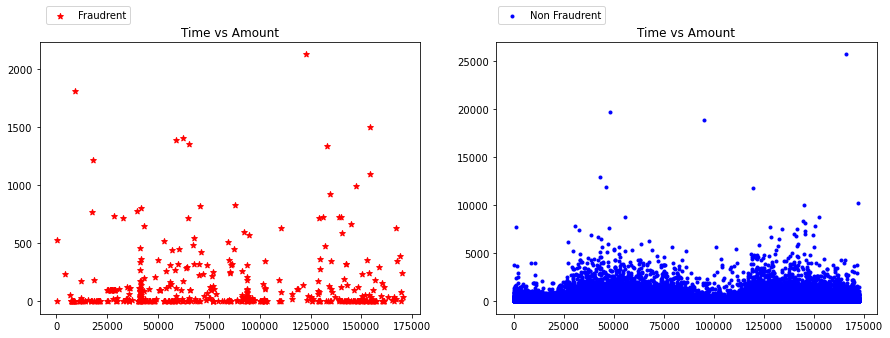

In [23]:
# plot relation with different scale
df1=Credit[Credit['Class']==1]
df2=Credit[Credit['Class']==0]
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(df1['Time'],df1['Amount'],color='red', marker= '*', label='Fraudrent')
ax[0].set_title('Time vs Amount')
ax[0].legend(bbox_to_anchor =(0.25, 1.15))

ax[1].scatter(df2['Time'],df2['Amount'],color='blue', marker= '.', label='Non Fraudrent')
ax[1].set_title('Time vs Amount')
ax[1].legend(bbox_to_anchor =(0.3, 1.15))

plt.show();


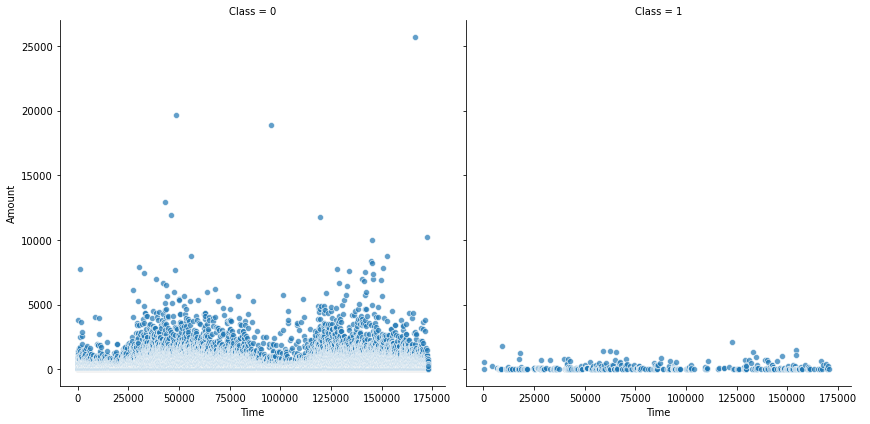

In [24]:
# plot relation in same scale
g = sns.FacetGrid(Credit, col="Class", height=6)
g.map(sns.scatterplot, "Time", "Amount", alpha=.7)
g.add_legend();


Distribution graphs:

In [25]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df= df[[col for col in Credit if nunique[col] > 1 and nunique[col] <50 ]]
    nRow, nCol =df.shape
    columnNames  = list(df)
    nGraphRow = (nCol + nGraphPerRow -1)/ nGraphPerRow
    plt.figure(num = None, figsize = (6* nGraphPerRow, 8*nGraphRow), dpi=80, facecolor ='w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i+ 1)
        columnDf= df.iloc[:, i]
        if(not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts= columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
            plt.ylabel('counts')
            plt.xticks(rotation = 90)
            plt.title(f'{columnNames[i]}(column {i})')
            plt.tight_layout(pad = 1.0, w_pad =1.0, h_pad= 1.0)
            plt.show()
    

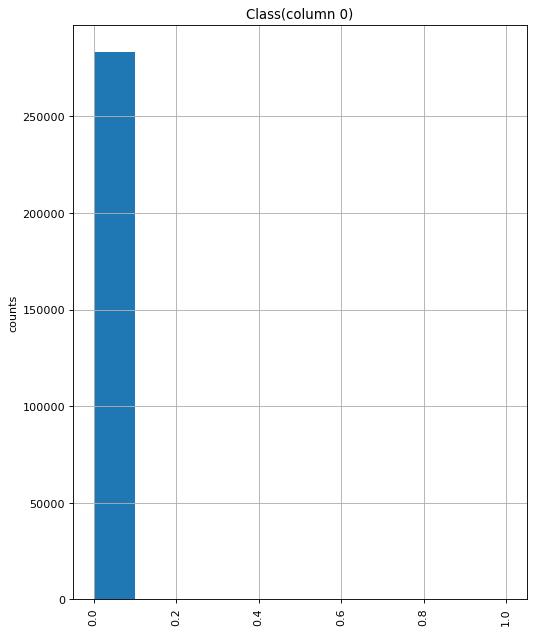

In [26]:
plotPerColumnDistribution(Credit, 10, 5)

Text(0, 0.5, 'Amount')

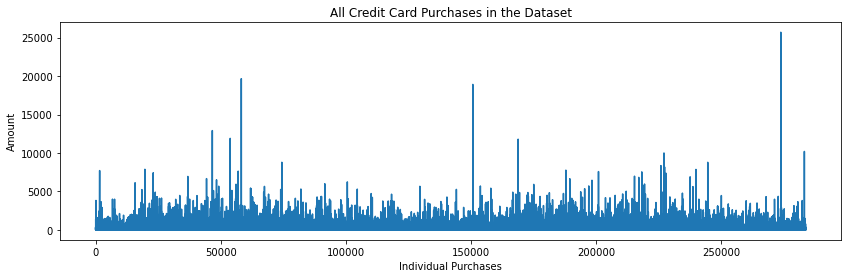

In [27]:
# plot all credit card purchase amounts

Credit['Amount'].plot(figsize = (14, 4 ))
plt.title("All Credit Card Purchases in the Dataset")
plt.xlabel("Individual Purchases")
plt.ylabel("Amount")
# noticeable outliers

In [28]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

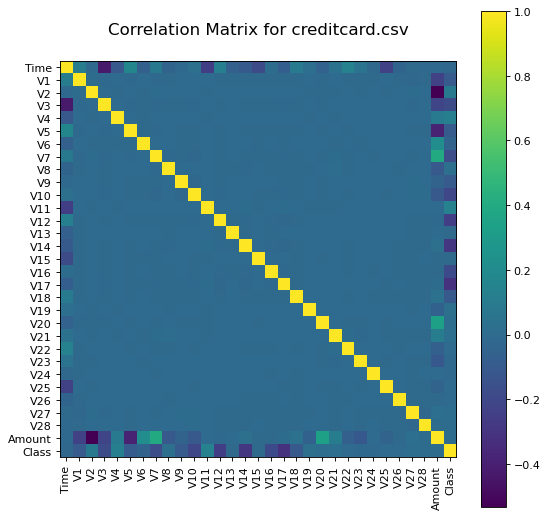

In [29]:
Credit.dataframeName = 'creditcard.csv'
plotCorrelationMatrix(Credit, 8)

Text(0.5, 1.0, 'Linear Correlation Heatmap Between Features in the Dataset')

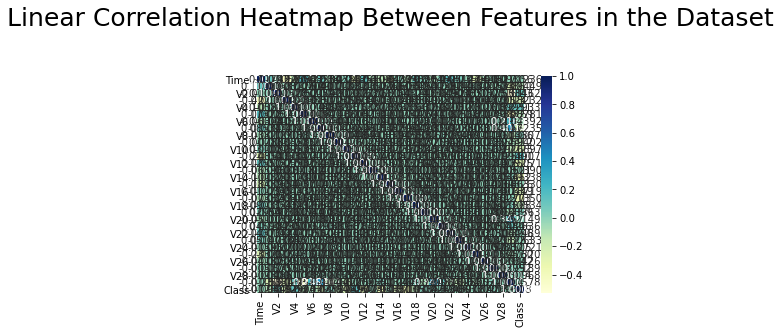

In [30]:

# heatmap to illustrate correlation between features 

ax = plt.axes()
sns.heatmap(Credit.corr(),ax=ax, cmap='YlGnBu', annot=True, fmt='.5f')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
sns.set(rc = {'figure.figsize':(50,10)})
ax.set_title('Linear Correlation Heatmap Between Features in the Dataset', fontsize= 25, pad=50)

The heatmap above titled 'Linear Correlation Heatmap Between Features in the Dataset' illustrates the various linear correlations between all the features in the dataset. There is positive and negative linear correlations between the 'Class' feature and numerous other features, e.g. 'V10' with negative correlation of -0.22, 'V17' with a negative correlaton of -0.33 and 'V11' with a positive correlation of 0.15. There seems to be no linear correlation between the 'Class' and 'Time' features, as well as between 'Class' and the 'Amount' features. This is not to say there is no non linear relationships found between these features. When fine tuning the model, it might be worth investigating whether the performance of the models improves if the features were dropped. </i>

<Figure size 3600x720 with 0 Axes>

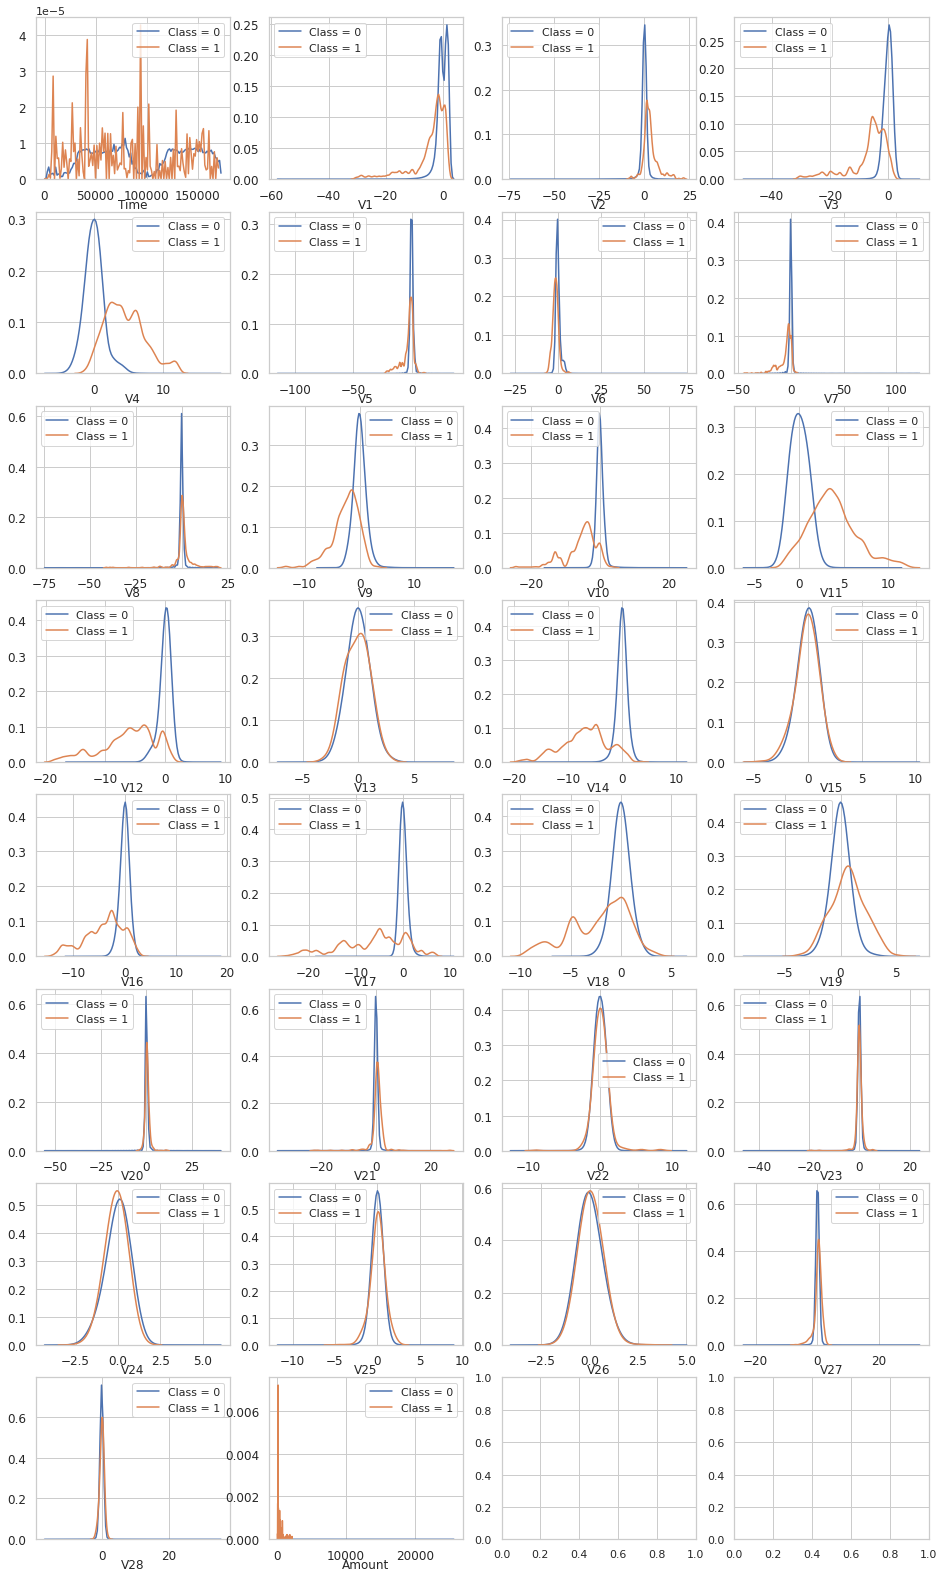

In [31]:
var = Credit.columns.values

i = 0
t0 = Credit.loc[Credit['Class'] == 0]
t1 = Credit.loc[Credit['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var[0:-1]:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12, labelpad=-4)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();


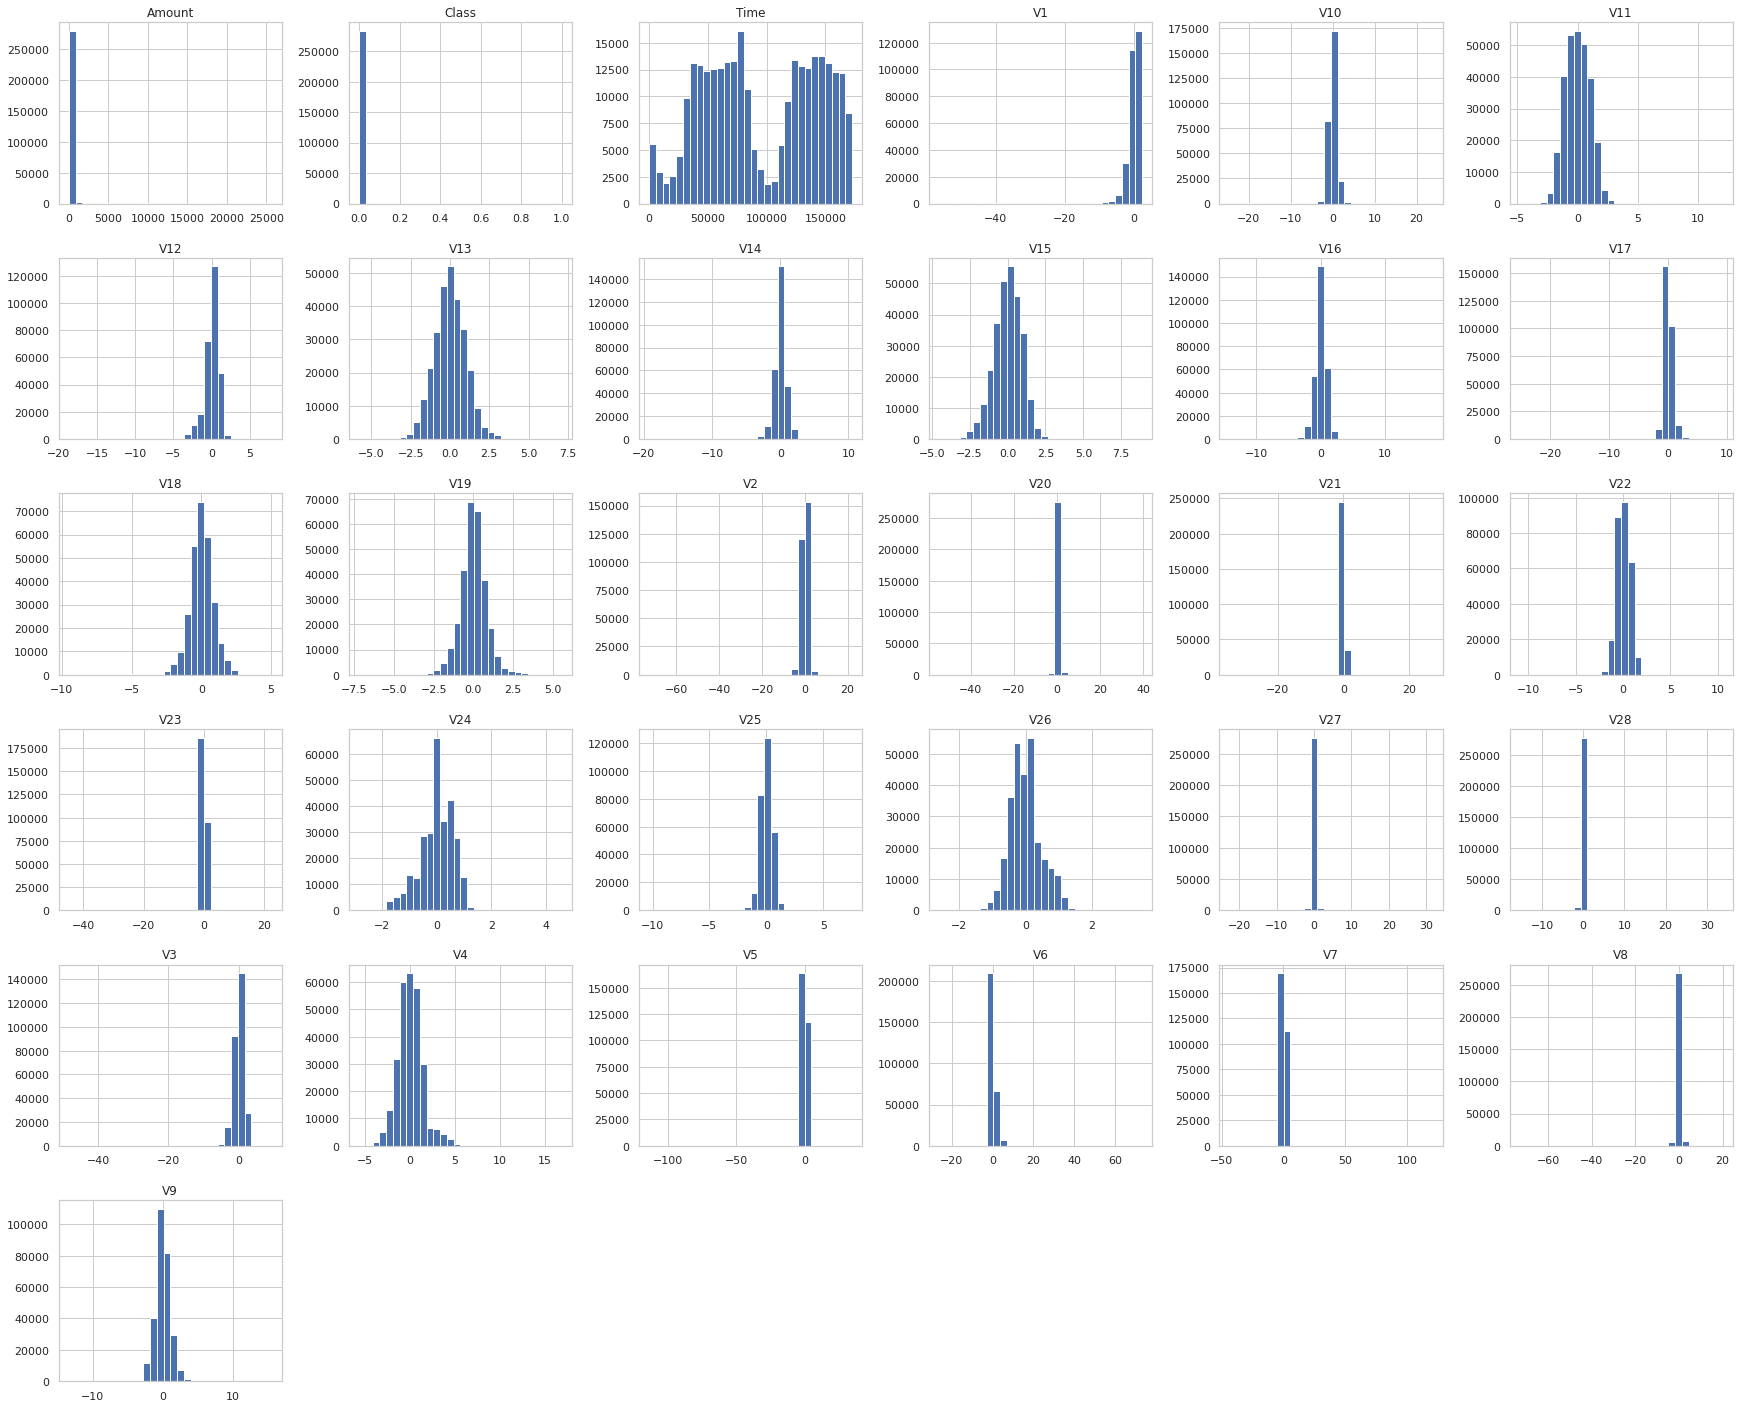

In [32]:
Credit.hist(figsize = (30, 25), bins = 30)
plt.show()


Dimensionality reduction by PCA

In [33]:
x = Credit.drop(['Class'], axis=True)
y = Credit['Class']

Data Scalling

In [34]:
# data standarization 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled = sc.fit_transform(x)


Dimensionality reduction by PCA

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
pct = pca.fit_transform(x_scaled)
print(np.round(pca.explained_variance_ratio_,decimals=3))
print('3 components explaining: ',sum(pca.explained_variance_ratio_[:3]))
print('4 components explaining: ',sum(pca.explained_variance_ratio_[:4]))
print('5 components explaining: ',sum(pca.explained_variance_ratio_[:5]))
print('6 components explaining: ',sum(pca.explained_variance_ratio_[:6]))
print('7 components explaining: ',sum(pca.explained_variance_ratio_[:7]))
print('8 components explaining: ',sum(pca.explained_variance_ratio_[:8]))
print('9 components explaining: ',sum(pca.explained_variance_ratio_[:9]))
print('10 components explaining: ',sum(pca.explained_variance_ratio_[:10]))
print('11 components explaining: ',sum(pca.explained_variance_ratio_[:11]))
print('12 components explaining: ',sum(pca.explained_variance_ratio_[:12]))
print('13 components explaining: ',sum(pca.explained_variance_ratio_[:13]))
print('14 components explaining: ',sum(pca.explained_variance_ratio_[:14]))
print('15 components explaining: ',sum(pca.explained_variance_ratio_[:15]))
print('16 components explaining: ',sum(pca.explained_variance_ratio_[:16]))
print('17 components explaining: ',sum(pca.explained_variance_ratio_[:17]))
print('18 components explaining: ',sum(pca.explained_variance_ratio_[:18]))
print('19 components explaining: ',sum(pca.explained_variance_ratio_[:19]))
print('20 components explaining: ',sum(pca.explained_variance_ratio_[:20]))
print('21 components explaining: ',sum(pca.explained_variance_ratio_[:21]))
print('22 components explaining: ',sum(pca.explained_variance_ratio_[:22]))
print('23 components explaining: ',sum(pca.explained_variance_ratio_[:23]))
print('24 components explaining: ',sum(pca.explained_variance_ratio_[:24]))
print('25 components explaining: ',sum(pca.explained_variance_ratio_[:25]))
print('26 components explaining: ',sum(pca.explained_variance_ratio_[:26]))
print('27 components explaining: ',sum(pca.explained_variance_ratio_[:27]))
print('28 components explaining: ',sum(pca.explained_variance_ratio_[:28]))
print('29 components explaining: ',sum(pca.explained_variance_ratio_[:29]))
print('30 components explaining: ',sum(pca.explained_variance_ratio_[:30]))


[0.066 0.056 0.034 0.034 0.034 0.034 0.034 0.034 0.034 0.034 0.034 0.034
 0.034 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
 0.033 0.032 0.032 0.031 0.011 0.001]
3 components explaining:  0.15605255088107114
4 components explaining:  0.19007051141741843
5 components explaining:  0.22397334226175317
6 components explaining:  0.2578301234433631
7 components explaining:  0.29155053007240594
8 components explaining:  0.32521740603877825
9 components explaining:  0.35884925804778484
10 components explaining:  0.3924605478250212
11 components explaining:  0.42606514432557463
12 components explaining:  0.45963443357691824
13 components explaining:  0.4931634515377768
14 components explaining:  0.5266506827312041
15 components explaining:  0.5600859134977151
16 components explaining:  0.5935091882037299
17 components explaining:  0.6269251532683853
18 components explaining:  0.6603117438925551
19 components explaining:  0.6936610404003072
20 components explaining:  0.7269

# Fitting the Data



Before proceeding with the Synthetic Minority Oversampling technique we have to separate the orginal dataframe.
For Good testing and accuracy purposes, we are splitting the data when implementing SMOTE, we want to test our models on the original testing set, not on the testing set created by either of this technique. Goal: is to fit the model either with the dataframes that were implemented with SMOTE, and test it on the original testing set.
This is done by using Stratified KFold as cross-validator that divides the dataset into k folds and Stratified is to ensure that each fold of dataset has the same proportion of observations with a given label. resulting: an improved version of classification tasks with imbalanced class distributions.


In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = Credit.drop('Class', axis=1)
y = Credit['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]
Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]
Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]


In [37]:
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# Check distribution
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.99833466 0.00166534]
[0.99832584 0.00167416]


In [38]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))


Length of X (train): 226981 | Length of y (train): 226981
Length of X (test): 56745 | Length of y (test): 56745


In [39]:
!pip install imblearn

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [41]:
# SMOTE oversampling to minority class
sm=SMOTE(sampling_strategy='minority', random_state=42)
X_sm,y_sm=sm.fit_resample(original_Xtrain,original_ytrain)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(453206, 30) (453206,)
226603 226603


# Model Selection

In [42]:
# Logistic Regression Classifier
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(original_Xtest)
y_logreg_prob=logreg.predict_proba(original_Xtest)[:,1]

In [43]:
# Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_logreg))
print("Accuracy:",metrics.accuracy_score(original_ytest,y_logreg))
print("Precision:",metrics.precision_score(original_ytest,y_logreg))
lr_recall_test=metrics.recall_score(original_ytest,y_logreg)
print("Recall:",metrics.recall_score(original_ytest,y_logreg))
lr_f1_test=metrics.f1_score(original_ytest,y_logreg)
print("F1-Score:",metrics.f1_score(original_ytest,y_logreg))
print("AUC:",metrics.roc_auc_score(original_ytest,y_logreg_prob))

Confusion Matrix:
 [[56553    97]
 [   17    78]]
Accuracy: 0.9979910124240021
Precision: 0.44571428571428573
Recall: 0.8210526315789474
F1-Score: 0.5777777777777778
AUC: 0.9841358294235147


In [44]:
# illustrate with a confusion matrix test

def confusion_matrix_plot(cfm,flxt,title):

    sns.set(rc = {'figure.figsize':(5,5)})
    ax = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='g')
    ax.set_title(f"Confusion Matrix for {title}\n\n");
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    # display the visualization of the Confusion Matrix.
    
    return plt.show()

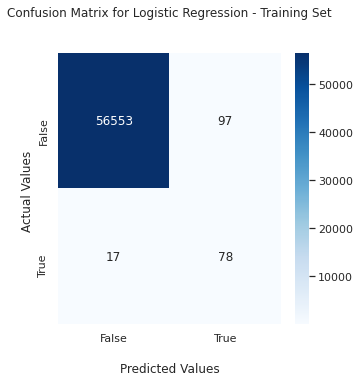

In [45]:
# graphical confusion matrix for lg train set
cnf_matrix= metrics.confusion_matrix(original_ytest,y_logreg)
confusion_matrix_plot(cnf_matrix, 'lg-train', 'Logistic Regression - Training Set')

In [46]:
# function for saving metric data to df and displaying/returning the df

model_eval = {
    'model': '',
    'recall_test' : '',
    'f1_score_test' : ''
}

def add_model_eval(model, recall_test, f1_score_test):
    model_eval['model'] = model
    model_eval['recall_test'] = f'{recall_test: .3f}'
    model_eval['f1_score_test'] = f'{f1_score_test: .3f}'

 
    return model_eval

def view_models_eval(df_results):
    
    
    df_results = df_results.append(model_eval, ignore_index=True)
    df_results = df_results.sort_values(by=['recall_test'], ascending=[False])

    return df_results

In [47]:
# create dataframe

df_metrics_table = pd.DataFrame()

In [48]:
# add Logistic Regression - Basline

add_model_eval('Logistic Regression', lr_recall_test, lr_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

,f1_score_test,model,recall_test
0,0.578,Logistic Regression,0.821


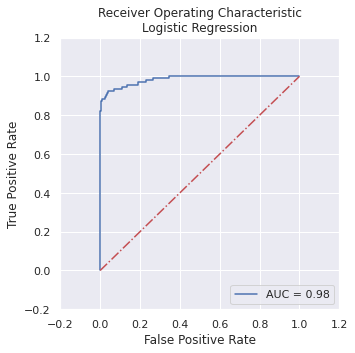

In [49]:
auc=metrics.roc_auc_score(original_ytest,y_logreg_prob)
# Plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini', max_depth=10)
dtc.fit(X_sm,y_sm)
y_p=dtc.predict(original_Xtest)
y_p_prob=dtc.predict_proba(original_Xtest)[:,1]

In [51]:
# Metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_p))
print("Accuracy:",metrics.accuracy_score(original_ytest,y_p))
print("Precision:",metrics.precision_score(original_ytest,y_p))
print("Recall:",metrics.recall_score(original_ytest,y_p))
dt_recall_test=metrics.recall_score(original_ytest,y_p)
print("F1-Score:",metrics.f1_score(original_ytest,y_p))
dt_f1_test= metrics.f1_score(original_ytest,y_p)
print("AUC:",metrics.roc_auc_score(original_ytest,y_p))

Confusion Matrix:
 [[56209   441]
 [   91     4]]
Accuracy: 0.9906247246453432
Precision: 0.008988764044943821
Recall: 0.042105263157894736
F1-Score: 0.014814814814814814
AUC: 0.5171603103079853


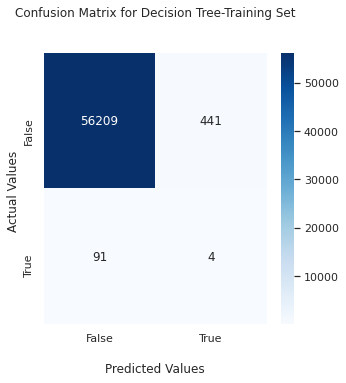

In [52]:
# graphical confusion matrix for dt train set
cnf_matrix_train_rf= metrics.confusion_matrix(original_ytest,y_p)
confusion_matrix_plot(cnf_matrix_train_rf, 'dt-train', 'Decision Tree-Training Set' )

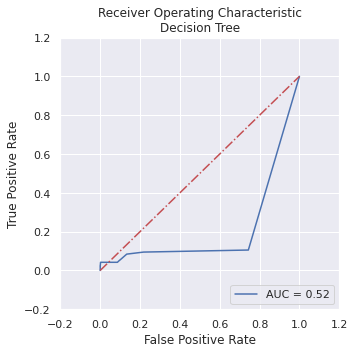

In [53]:
auc=metrics.roc_auc_score(original_ytest,y_p)
# Plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_p_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nDecision Tree')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
# add Decision Tree - Basline

add_model_eval('Decision Tree', dt_recall_test, dt_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

,f1_score_test,model,recall_test
0,0.578,Logistic Regression,0.821
1,0.015,Decision Tree,0.042


KNN Classifier

In [ ]:
# KNN Classifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm,y_sm)
y_knn=knn.predict(original_Xtest)
y_knn_prob=knn.predict_proba(original_Xtest)[:,1]

In [66]:
# Metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_knn))
print("Accuracy:",metrics.accuracy_score(original_ytest,y_knn))
print("Precision:",metrics.precision_score(original_ytest,y_knn))
print("Recall:",metrics.recall_score(original_ytest,y_knn))
knn_recall_test=metrics.recall_score(original_ytest,y_knn)
print("F1-Score:",metrics.f1_score(original_ytest,y_knn))
knn_f1_test= metrics.f1_score(original_ytest,y_knn)
print("AUC:",metrics.roc_auc_score(original_ytest,y_knn))

Confusion Matrix:
 [[56650     0]
 [   95     0]]
Accuracy: 0.9983258436866684
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
AUC: 0.5


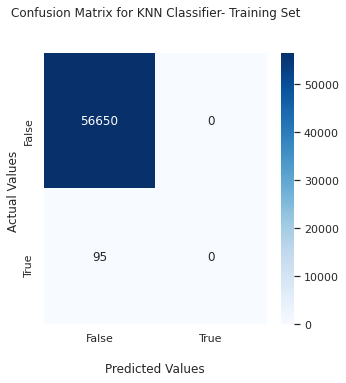

In [67]:
# graphical confusion matrix for knn train set
cnf_matrix_train_rf= metrics.confusion_matrix(original_ytest,y_knn)
confusion_matrix_plot(cnf_matrix_train_rf, 'knn-train', 'KNN Classifier- Training Set' )

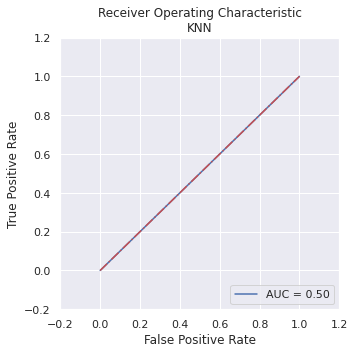

In [68]:
auc=metrics.roc_auc_score(original_ytest,y_knn)
# Plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_knn_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nKNN')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [69]:
# add KNN- Basline

add_model_eval('KNN Classifier', knn_recall_test, knn_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

,f1_score_test,model,recall_test
0,0.578,Logistic Regression,0.821
1,0.750,Random Forest,0.600
2,0.015,Decision Tree,0.042
3,0.000,KNN Classifier,0.000


In [60]:
# RandomForest Classifier
rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(original_Xtest)
y_rf_prob=rf.predict_proba(original_Xtest)[:,1]

In [61]:
# Metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(original_ytest,y_rf))
cnf_matrix_test_rf=metrics.confusion_matrix(original_ytest,y_rf)
print("Accuracy:",metrics.accuracy_score(original_ytest,y_rf))
print("Precision:",metrics.precision_score(original_ytest,y_rf))
print("Recall:",metrics.recall_score(original_ytest,y_rf))
rf_recall_test=metrics.recall_score(original_ytest,y_rf)
print("F1-Score:",metrics.f1_score(original_ytest,y_rf))
rf_f1_test=metrics.f1_score(original_ytest,y_rf)
print("AUC:",metrics.roc_auc_score(original_ytest,y_rf))

Confusion Matrix:
 [[56650     0]
 [   38    57]]
Accuracy: 0.9993303374746674
Precision: 1.0
Recall: 0.6
F1-Score: 0.7499999999999999
AUC: 0.8


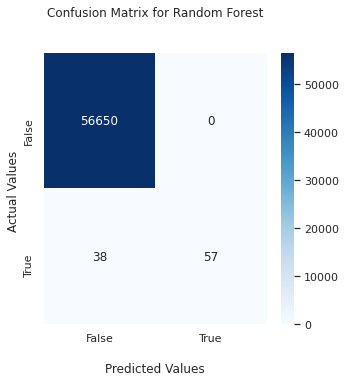

In [62]:
# graphical confusion matrix for rf train set

confusion_matrix_plot(cnf_matrix_test_rf, 'rf-test', 'Random Forest' )

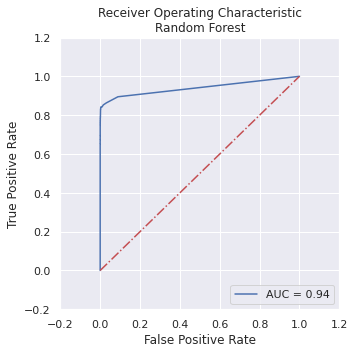

In [63]:
auc=metrics.roc_auc_score(original_ytest,y_rf_prob)
# Plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(original_ytest,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [64]:
 # add Random Forest - Basline

add_model_eval('Random Forest',rf_recall_test, rf_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

,f1_score_test,model,recall_test
0,0.578,Logistic Regression,0.821
2,0.750,Random Forest,0.600
1,0.015,Decision Tree,0.042
